In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [4]:
# pulls that data and places it into train / val / test


(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /Users/metamorphosis/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [5]:
# prints classes 

num_classes = metadata.features['label'].num_classes
print(num_classes)


5


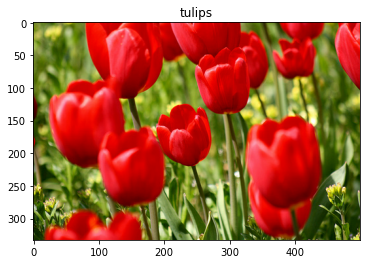

In [7]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))


In [10]:
iter(train_ds)

In [12]:
# Resize and rescaling

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])


Min and max pixel values: 0.0 1.0


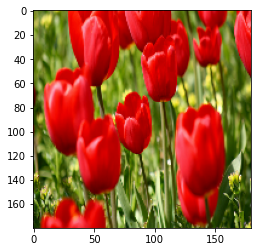

In [14]:

""" resize n rescale """
result = resize_and_rescale(image)

_ = plt.imshow(result)

print("Min and max pixel values:", result.numpy().min(), result.numpy().max())
print()


In [15]:
# Add the image to a batch
image = tf.expand_dims(image, 0)


In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [16]:
image.shape

TensorShape([1, 333, 500, 3])

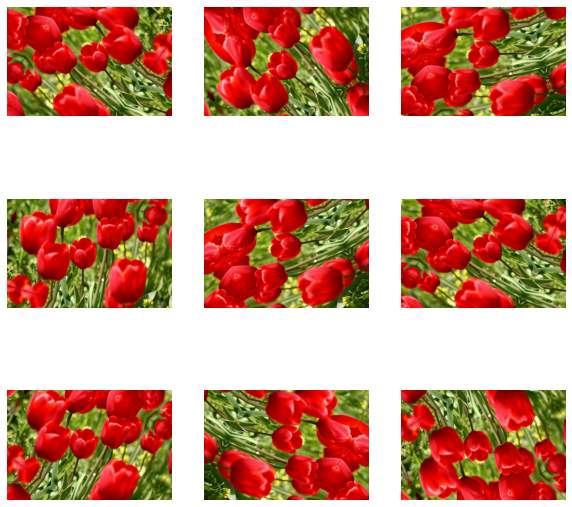

In [19]:
plt.figure(figsize=(10, 10))
for i in range(9):
    """ augmenting """
    
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")


---